<h2><b><i>5.1. Быстрый анализ данных</i></b></h2>

<h4><b><i>Подключение библиотек</i></b></h4>

In [3]:
import pandas as pd
import numpy as np


<h4><b><i>Импортирование выборки</i></b></h4>

In [4]:
df = pd.read_csv('la_crime_200_recs.csv')
df

,dr_number,date_reported,date_occurred,time_occurred,area_id,area_name,reporting_district,crime_code,crime_code_description,mo_codes,...,weapon_description,status_code,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,address,cross_street,location
0,1208575,3/14/13,3/11/13,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,1/25/10,1/22/10,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,3/19/13,3/18/13,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/10,11/10/10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,1/11/14,1/4/14,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),329,...,NaN,IC,Invest Cont,745,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,130100866,4/28/13,4/28/13,100,1,Central,153,888,TRESPASSING,NaN,...,NaN,IC,Invest Cont,888,NaN,NaN,NaN,500 S BROADWAY,NaN,"(34.0481, -118.2507)"
195,130100872,5/4/13,5/4/13,1300,1,Central,162,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0104 0344 1300 0326,...,NaN,AA,Adult Arrest,341,NaN,NaN,NaN,400 W 7TH ST,NaN,"(34.0459, -118.2545)"
196,101220336,7/29/10,7/29/10,2000,12,77th Street,1259,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510,NaN,NaN,NaN,78TH,CENTRAL,"(33.9685, -118.2564)"
197,130100874,5/5/13,5/5/13,1015,1,Central,166,624,BATTERY - SIMPLE ASSAULT,0416 0603,...,MACE/PEPPER SPRAY,IC,Invest Cont,624,NaN,NaN,NaN,5TH ST,S SAN JULIAN ST,"(34.0446, -118.245)"


<h4><b><i>Количество строк и столбцов в таблице</i></b></h4>

In [5]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print(f'Столбцы: {rows}, колонки: {cols}')

Столбцы: 199, колонки: 26


<h4><b><i>Названия столбцов</i></b></h4>

In [6]:
counter = 0
for i in df.columns:
    counter+=1
    print(f'{counter}. {i}')

1. dr_number
2. date_reported
3. date_occurred
4. time_occurred
5. area_id
6. area_name
7. reporting_district
8. crime_code
9. crime_code_description
10. mo_codes
11. victim_age
12. victim_sex
13. victim_descent
14. premise_code
15. premise_description
16. weapon _used_code
17. weapon_description
18. status_code
19. status_description
20. crime_code_1
21. crime_code_2
22. crime_code_3
23. crime_code_4
24. address
25. cross_street
26. location 


<h4><b><i>Типы данных столбцов</i></b></h4>

In [7]:
df.dtypes

dr_number                   int64
date_reported              object
date_occurred              object
time_occurred               int64
area_id                     int64
area_name                  object
reporting_district          int64
crime_code                  int64
crime_code_description     object
mo_codes                   object
victim_age                float64
victim_sex                 object
victim_descent             object
premise_code                int64
premise_description        object
weapon _used_code         float64
weapon_description         object
status_code                object
status_description         object
crime_code_1                int64
crime_code_2              float64
crime_code_3              float64
crime_code_4              float64
address                    object
cross_street               object
location                   object
dtype: object

<h4><b><i>Количество уникальных значений в таблице</i></b></h4>

In [8]:
count = 0
for i in df.columns:
    count += len(df[i].unique())
count

1457

<h4><b><i>Количество пропущенных значений в таблице</i></b></h4>

In [9]:
df.isnull().sum().sum()
    

1187

<h4><b><i>Распределение числовых переменных трех столбцов</i></b></h4>

array([[<Axes: title={'center': 'premise_code'}>]], dtype=object)

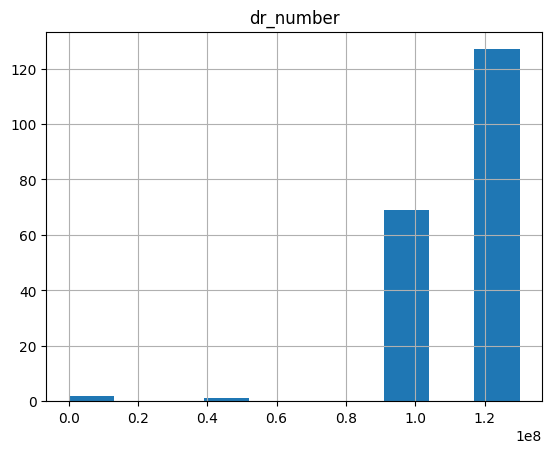

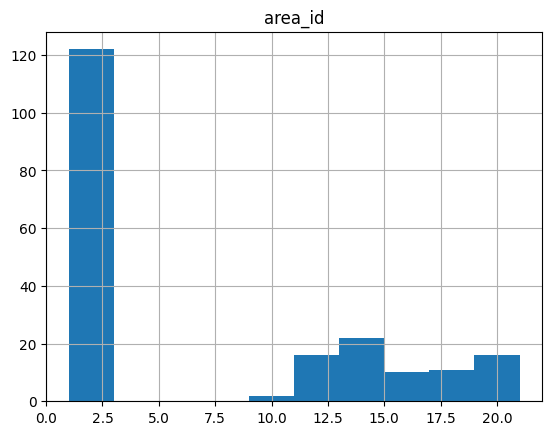

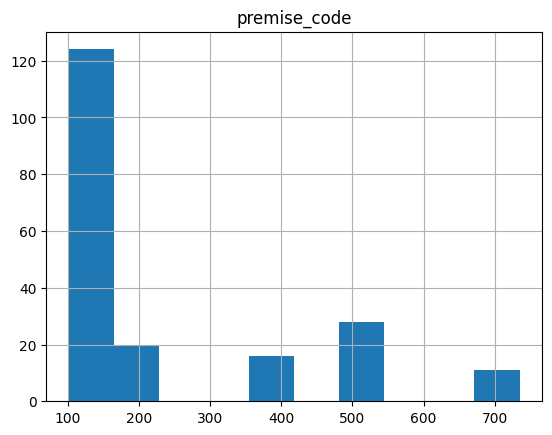

In [10]:
df.hist('dr_number')
df.hist('area_id')
df.hist('premise_code')

<h4><b><i>5.2. Жертвы</i></b></h4>

In [11]:
male = 0
female = 0

for i in df['victim_sex']:
    if(i == 'M'):
        male += 1
    elif(i == 'F'):
        female += 1

print(f'Женщин: {female}, мужчин: {male}. Предположение неверно.')


Женщин: 54, мужчин: 82. Предположение неверно.


<h4><b><i>5.3. Преступления, пол и возраст</i></b></h4>

<p><b><i>• Как различается вероятность женщин и мужчин стать жертвой в зависимости от воз‑
раста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще ста‑
новятся жетрвами преступлений?</p></b></i>

In [12]:
import matplotlib.pyplot as plt

male = df[df['victim_sex'] == 'M']
female = df[df['victim_sex'] == 'F']

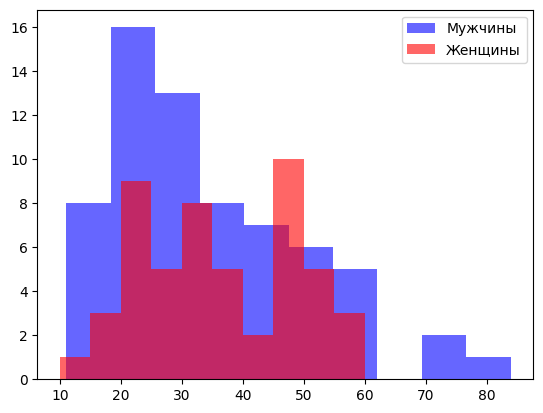

In [13]:
plt.hist(male['victim_age'], color='b', alpha=0.6, label='Мужчины')
plt.hist(female['victim_age'], color='r', alpha=0.6, label='Женщины')
plt.legend()
plt.show()

<p>Мужчины чаще всего становятся жертвами в возрасте ~20 лет</p>

In [31]:
print(df['crime_code'])

0      626
1      510
2      510
3      510
4      745
      ... 
194    888
195    341
196    510
197    624
198    210
Name: crime_code, Length: 199, dtype: int64


<p><b><i>• От каких преступлений чаще старадют женщины, а от каких мужчины?</p></b></i>

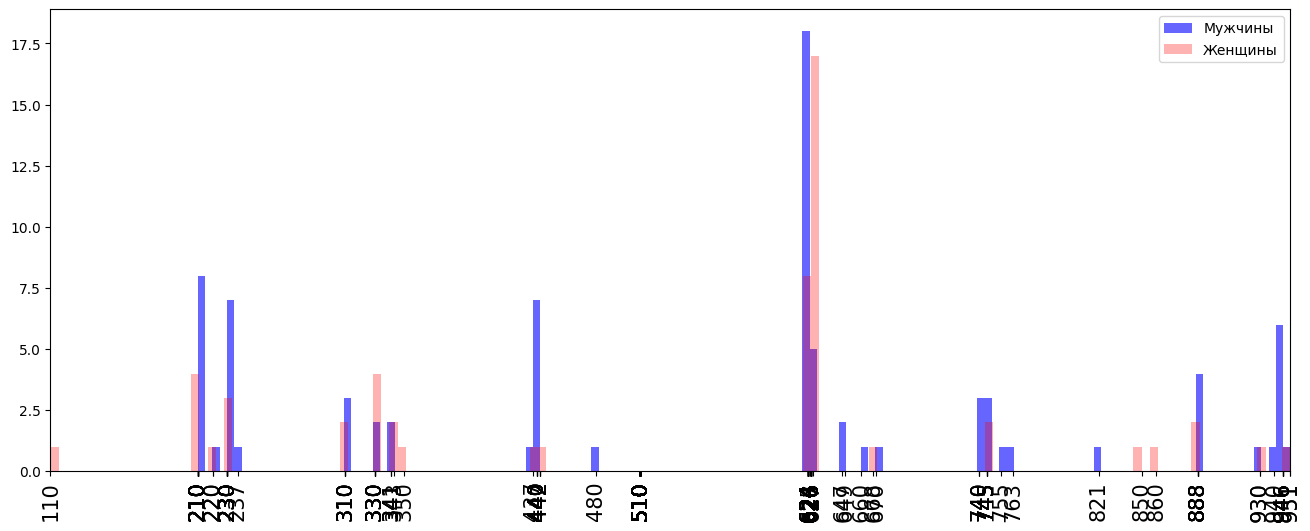

In [36]:
plt.figure(figsize=(16, 6))
plt.hist(male['crime_code'], color='b', alpha=0.6, label='Мужчины', bins=150)
plt.hist(female['crime_code'], color='r', alpha=0.3, label='Женщины', bins= 150)
plt.xticks(rotation=90)
plt.xlim(min(df['crime_code']), max(df['crime_code']))
plt.xticks(df['crime_code'], fontsize=15)
plt.legend()
plt.show()

Как можно заметить, жертвами преступлений с кодом 624 и 626 становятся в большинстве как женщины, так и мужчины 

<h4><b><i>5.4. Происхождение</i></b></h4>

In [44]:
df.victim_descent.value_counts().head(1)


H    62
Name: victim_descent, dtype: int64

Люди происхождения Hispanic/Latin/Mexican чаще всего подвергаются преступлениям

<h4><b><i>5.5. Место происшествия</i></b></h4>

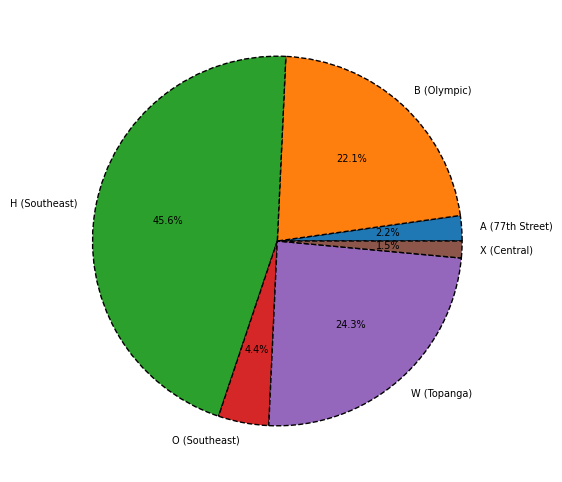

In [72]:
victim_people = df.groupby('victim_descent')['area_name'].count()
labels = [f"{desc} ({area})" for desc, area in zip(victim_people.index, df['area_name'].values)]

plt.figure(figsize=(16, 6))
plt.pie(victim_people, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, textprops={'fontsize': 7})
plt.show()

По данным с графика, можно сделать вывод, что чаще всего подвергаются преступлениям люди происхождения Hispanic/Latin/Mexican в районе Southeast